## Importing Libraries and Data

In [1]:
# Importing Libraries

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Link to the dataset - [Click]("https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam")

In [2]:
first_file = 'games.json'
with open(first_file, 'r') as file:
    json_data = json.load(file)

In [3]:
# Variables I won't analyze
unnecessary_vars = [
    'packages', 'screenshots', 'movies', 'score_rank', 'header_image',
    'reviews', 'website', 'support_url', 'notes', 'support_email',
    'recommendations', 'user_score', 'median_playtime_forever',
    'median_playtime_2weeks', 'required_age', 'metacritic_score',
    'metacritic_url', 'detailed_description', 'about_the_game',
    'achievements', 'full_audio_languages','genres', 'dlc_count',
    'supported_languages', 'developers','publishers',
    'average_playtime_2weeks'
]

In [4]:
# Process each game's information and store it in a list
games = [{
    **{k: v for k, v in game_info.items() if k not in unnecessary_vars},
    'tags': list(tags.keys()) if isinstance((tags := game_info.get('tags', {})), dict) else [],
    'tag_frequencies': list(tags.values()) if isinstance(tags, dict) else [],
    'app_id': app_id
} for app_id, game_info in json_data.items()]

# Create a DataFrame from the processed list
df = pd.DataFrame(games)
df.head()


,name,release_date,price,short_description,windows,mac,linux,categories,positive,negative,estimated_owners,average_playtime_forever,peak_ccu,tags,tag_frequencies,app_id
0,Galactic Bowling,"Oct 21, 2008",19.99,Galactic Bowling is an exaggerated and stylize...,True,False,False,"[Single-player, Multi-player, Steam Achievemen...",6,11,0 - 20000,0,0,"[Indie, Casual, Sports, Bowling]","[22, 21, 21, 6]",20200
1,Train Bandit,"Oct 12, 2017",0.99,THE LAW!! Looks to be a showdown atop a train....,True,True,False,"[Single-player, Steam Achievements, Full contr...",53,5,0 - 20000,0,0,"[Indie, Action, Pixel Graphics, 2D, Retro, Arc...","[109, 103, 100, 97, 93, 86, 84, 82, 76, 69, 65...",655370
2,Jolt Project,"Nov 17, 2021",4.99,"Shoot vehicles, blow enemies with a special at...",True,False,False,[Single-player],0,0,0 - 20000,0,0,[],[],1732930
3,Henosis™,"Jul 23, 2020",5.99,HENOSIS™ is a mysterious 2D Platform Puzzler w...,True,True,True,"[Single-player, Full controller support]",3,0,0 - 20000,0,0,"[2D Platformer, Atmospheric, Surreal, Mystery,...","[161, 154, 151, 145, 139, 128, 126, 122, 115, ...",1355720
4,Two Weeks in Painland,"Feb 3, 2020",0.00,Two Weeks in Painland is a story-driven game a...,True,True,False,"[Single-player, Steam Achievements]",50,8,0 - 20000,0,0,"[Indie, Adventure, Nudity, Violent, Sexual Con...","[42, 41, 22, 21, 21, 11]",1139950


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      97410 non-null  object 
 1   release_date              97410 non-null  object 
 2   price                     97410 non-null  float64
 3   short_description         97410 non-null  object 
 4   windows                   97410 non-null  bool   
 5   mac                       97410 non-null  bool   
 6   linux                     97410 non-null  bool   
 7   categories                97410 non-null  object 
 8   positive                  97410 non-null  int64  
 9   negative                  97410 non-null  int64  
 10  estimated_owners          97410 non-null  object 
 11  average_playtime_forever  97410 non-null  int64  
 12  peak_ccu                  97410 non-null  int64  
 13  tags                      97410 non-null  object 
 14  tag_fr

In [6]:
df.head()

,name,release_date,price,short_description,windows,mac,linux,categories,positive,negative,estimated_owners,average_playtime_forever,peak_ccu,tags,tag_frequencies,app_id
0,Galactic Bowling,"Oct 21, 2008",19.99,Galactic Bowling is an exaggerated and stylize...,True,False,False,"[Single-player, Multi-player, Steam Achievemen...",6,11,0 - 20000,0,0,"[Indie, Casual, Sports, Bowling]","[22, 21, 21, 6]",20200
1,Train Bandit,"Oct 12, 2017",0.99,THE LAW!! Looks to be a showdown atop a train....,True,True,False,"[Single-player, Steam Achievements, Full contr...",53,5,0 - 20000,0,0,"[Indie, Action, Pixel Graphics, 2D, Retro, Arc...","[109, 103, 100, 97, 93, 86, 84, 82, 76, 69, 65...",655370
2,Jolt Project,"Nov 17, 2021",4.99,"Shoot vehicles, blow enemies with a special at...",True,False,False,[Single-player],0,0,0 - 20000,0,0,[],[],1732930
3,Henosis™,"Jul 23, 2020",5.99,HENOSIS™ is a mysterious 2D Platform Puzzler w...,True,True,True,"[Single-player, Full controller support]",3,0,0 - 20000,0,0,"[2D Platformer, Atmospheric, Surreal, Mystery,...","[161, 154, 151, 145, 139, 128, 126, 122, 115, ...",1355720
4,Two Weeks in Painland,"Feb 3, 2020",0.00,Two Weeks in Painland is a story-driven game a...,True,True,False,"[Single-player, Steam Achievements]",50,8,0 - 20000,0,0,"[Indie, Adventure, Nudity, Violent, Sexual Con...","[42, 41, 22, 21, 21, 11]",1139950


In [7]:
df['Month'] = df['release_date'].str.split(' ').str[0]
df['Year'] = df['release_date'].str.split(' ').str[-1]
df['Year'] = df['Year'].astype(int)
# Combine the 'month' and 'year' columns into a single column
df['month_year'] = df['Month'] + ' ' + df['Year'].astype(str)

# Display the DataFrame to check the new column
df.head()

df['month_year'] = pd.to_datetime(df['month_year'])

In [8]:
clean_df = df[df["month_year"]<"2024-08-01"]

In [9]:
cats_expanded = []
for idx, row in clean_df.iterrows():
    for cat in row["categories"]:
        cats_expanded.append({'index': idx, 'cat': cat, 'value': 1})  # Add a 'value' column

# Create a DataFrame from the expanded list
expanded_cats_df = pd.DataFrame(cats_expanded)

# Pivot table with the 'value' column
pivot_cats_df = expanded_cats_df.pivot_table(index='index', columns='cat', values='value', fill_value=0)

# Show the first few rows of the pivot table
pivot_cats_df.head()


cat,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Family Sharing,Full controller support,HDR available,In-App Purchases,Includes Source SDK,Includes level editor,...,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Controller Support,Tracked Motion Controller Support,VR Only,VR Support,VR Supported,Valve Anti-Cheat enabled
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


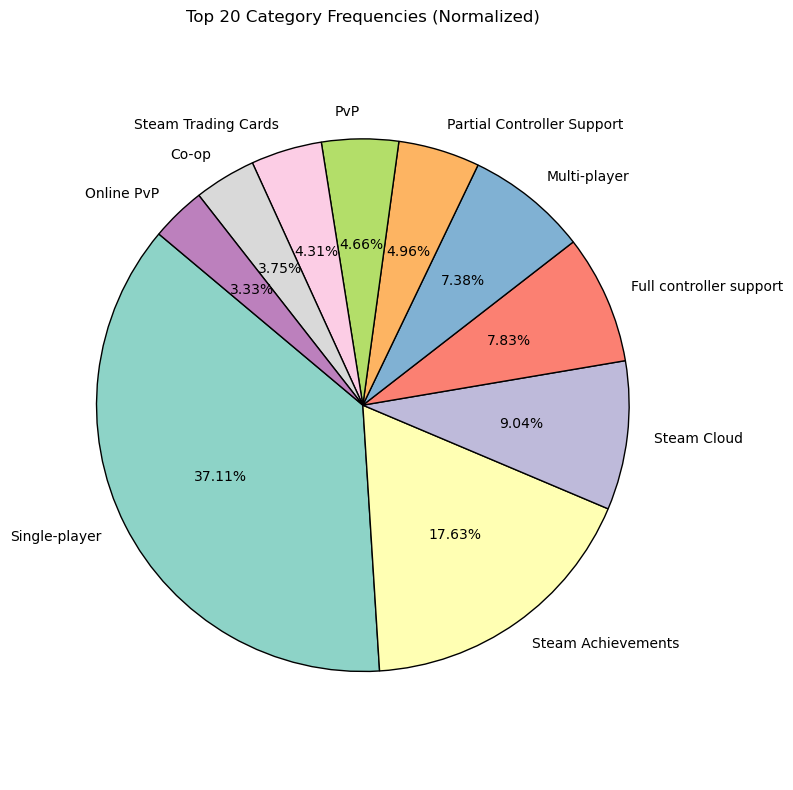

In [10]:
# Calculate total frequency summation for normalization
summation = pivot_cats_df.sum().sum()

# Calculate the top 10 categories by frequency and normalize them by dividing by total summation
top_cats = (pivot_cats_df.sum() / summation).sort_values(ascending=False).head(10)

# Convert top_cats to a DataFrame for plotting
top_cats_df = top_cats.reset_index()
top_cats_df.columns = ['Categories', 'Frequency']  # Rename columns for clarity

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(
    top_cats_df['Frequency'], 
    labels=top_cats_df['Categories'], 
    autopct='%1.2f%%',  # Display percentages on the pie chart
    startangle=140, 
    colors=sns.color_palette('Set3'),  # Use a different color palette for variety
    wedgeprops={'edgecolor': 'black'}  # Black edge for clarity
)

# Add a title
plt.title('Top 20 Category Frequencies (Normalized)')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
tags_expanded = []
for idx, row in clean_df.iterrows():
    for tag, freq in zip(row['tags'], row['tag_frequencies']):
        tags_expanded.append({'index': idx, 'tag': tag, 'freq': freq})

expanded_tags_df = pd.DataFrame(tags_expanded)

pivot_tags_df = expanded_tags_df.pivot_table(index='index', columns='tag', values='freq', fill_value=0)

pivot_tags_df


tag,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,56.0,0.0,161.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,111.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


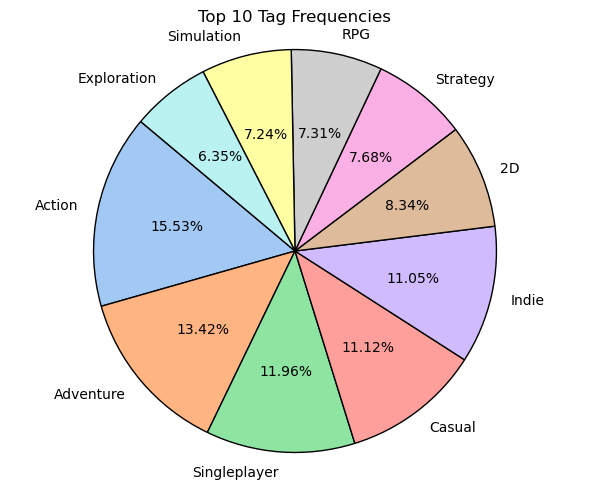

In [12]:
# Calculate total frequency summation for normalization
summation = pivot_tags_df.sum().sum()

# Calculate the top 10 tags by frequency and normalize them by dividing by total summation
top_tags = (pivot_tags_df.sum() / summation).sort_values(ascending=False).head(10)

# Convert top_tags to a DataFrame for plotting
top_tags_df = top_tags.reset_index()
top_tags_df.columns = ['Tag', 'Frequency']  # Rename columns for clarity

# Create the pie chart
plt.figure(figsize=(6, 5))  # Set figure size
plt.pie(
    top_tags_df['Frequency'], 
    labels=top_tags_df['Tag'], 
    autopct='%1.2f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Top 10 Tag Frequencies')

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


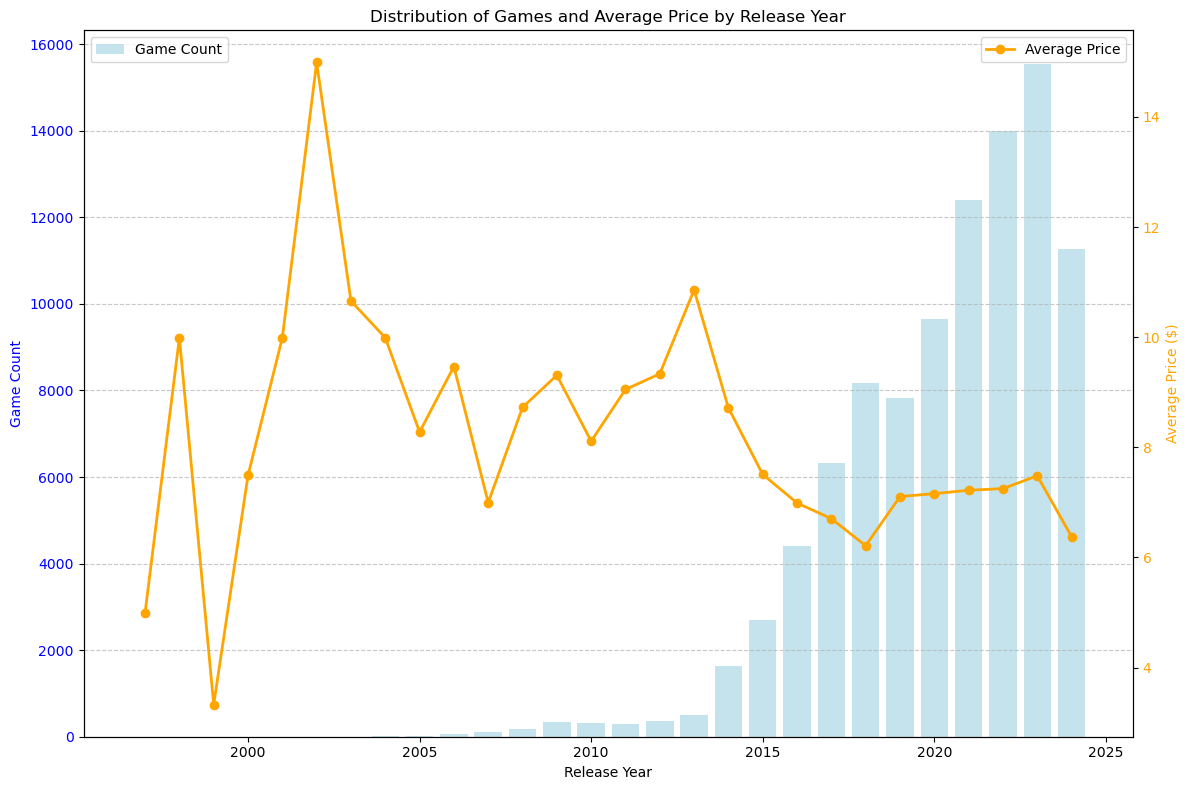

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 8))
games_by_year = clean_df.groupby('Year').size()

avg_price_by_year = clean_df.groupby('Year')['price'].mean()

ax1.bar(games_by_year.index, games_by_year, color='lightblue', alpha=0.7, label='Game Count')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Game Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(avg_price_by_year.index, avg_price_by_year, color='orange', marker='o', linestyle='-', linewidth=2, label='Average Price')
ax2.set_ylabel('Average Price ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Games and Average Price by Release Year')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [14]:
windows_only = df[(df['windows'] == 1) & (df['linux'] == 0) & (df['mac'] == 0)]
linux_only = df[(df['windows'] == 0) & (df['linux'] == 1) & (df['mac'] == 0)]
mac_only = df[(df['windows'] == 0) & (df['linux'] == 0) & (df['mac'] == 1)]
all_os = df[(df['windows'] == 1) & (df['linux'] == 1) & (df['mac'] == 1)]

avg_price_windows = windows_only['price'].mean()
avg_price_linux = linux_only['price'].mean()
avg_price_mac = mac_only['price'].mean()
avg_price_all = all_os['price'].mean()

max_win_price = windows_only['price'].max()
max_linux_price = linux_only['price'].max()
max_mac_price = mac_only['price'].max()
max_all_os = all_os['price'].max()

print("No of Windows only Games:",windows_only.shape[0])
print("No of Linux only Games:",linux_only.shape[0])
print("No of Mac only Games:",mac_only.shape[0])
print("No of Games supported on all OS:",all_os.shape[0])
print("==================================================")
print(f"Average price of a windows only game: {avg_price_windows:.2f} USD")
print(f"Average price of a linux only game: {avg_price_linux:.2f} USD")
print(f"Average price of a mac only game: {avg_price_mac:.2f} USD")
print(f"Average price of a game supported on all os: {avg_price_all:.2f} USD")
print("==================================================")
print(f"Max price of a game on windows only: {max_win_price} USD")
print(f"Max price of a game on linux only: {max_linux_price} USD")
print(f"Max price of a game on mac only: {max_mac_price} USD")
print(f"Max price of a game on all os: {max_all_os} USD")

No of Windows only Games: 76660
No of Linux only Games: 6
No of Mac only Games: 25
No of Games supported on all OS: 9317
Average price of a windows only game: 6.92 USD
Average price of a linux only game: 6.96 USD
Average price of a mac only game: 20.55 USD
Average price of a game supported on all os: 8.57 USD
Max price of a game on windows only: 999.98 USD
Max price of a game on linux only: 29.99 USD
Max price of a game on mac only: 199.99 USD
Max price of a game on all os: 199.99 USD


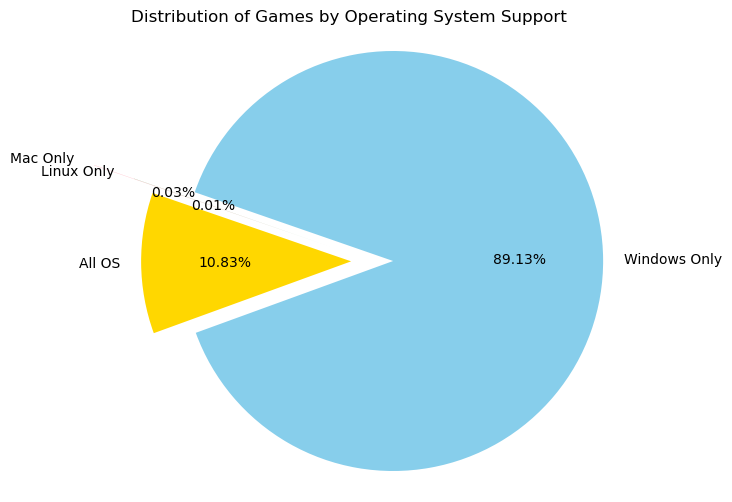

In [15]:
count_windows_only = len(windows_only)
count_linux_only = len(linux_only)
count_mac_only = len(mac_only)
count_all_os = len(all_os)

labels = ['Windows Only', 'Linux Only', 'Mac Only', 'All OS']
sizes = [count_windows_only, count_linux_only, count_mac_only, count_all_os]

colors = ['skyblue', 'green', 'pink', 'gold']
explode = (0.1, 0.2, 0.4, 0.1) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=200,explode=explode)
plt.title('Distribution of Games by Operating System Support')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

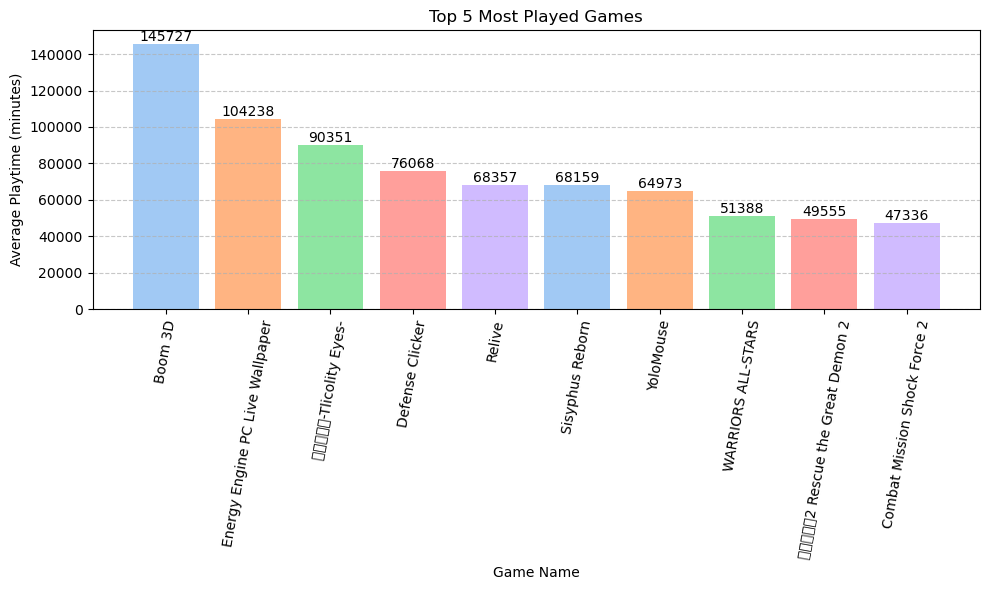

In [16]:
palette = sns.color_palette("pastel", 5)

plt.figure(figsize=(10, 6))
sorted_df = df.sort_values(by='average_playtime_forever', ascending=False)
bars = plt.bar(sorted_df['name'].head(10), sorted_df['average_playtime_forever'].head(10), color=palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Average Playtime (minutes)')
plt.title('Top 5 Most Played Games')
plt.xticks(rotation=80)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

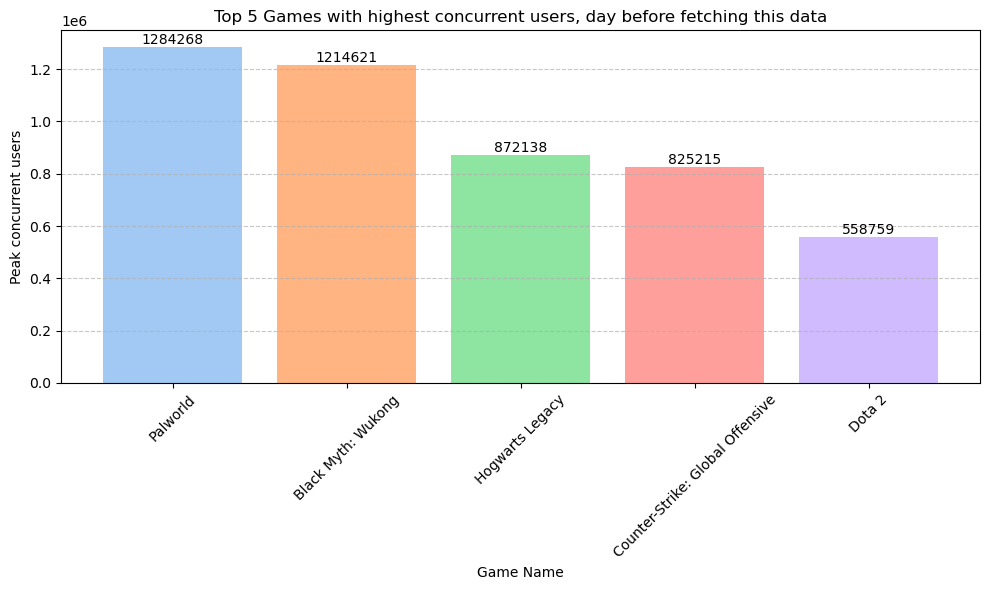

In [17]:
plt.figure(figsize=(10, 6))

sorted_df = df.sort_values(by='peak_ccu', ascending=False)

bars = plt.bar(sorted_df['name'].head(5), sorted_df['peak_ccu'].head(5), color=palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Peak concurrent users')
plt.title('Top 5 Games with highest concurrent users, day before fetching this data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

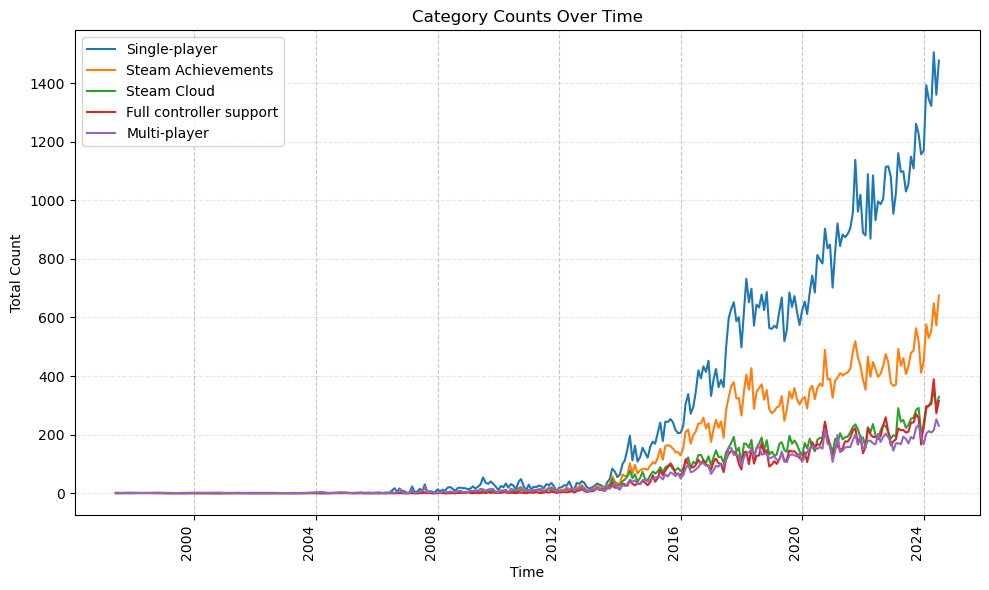

In [18]:
# Merge the 'month_year' column with the selected categories from pivot_cats_df
selected_categories = pivot_cats_df.sum().sort_values(ascending=False).head(5).index.to_list()

# Create a DataFrame with the month_year column and the selected categories
merged_df = pd.merge(clean_df[['month_year']], pivot_cats_df[selected_categories], how='inner', left_index=True, right_index=True)

# Group by 'month_year' and sum the values
grouped_df = merged_df.groupby('month_year').sum()

# Plot the grouped data
grouped_df.plot(figsize=(10, 6))

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Total Count')
plt.title('Category Counts Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


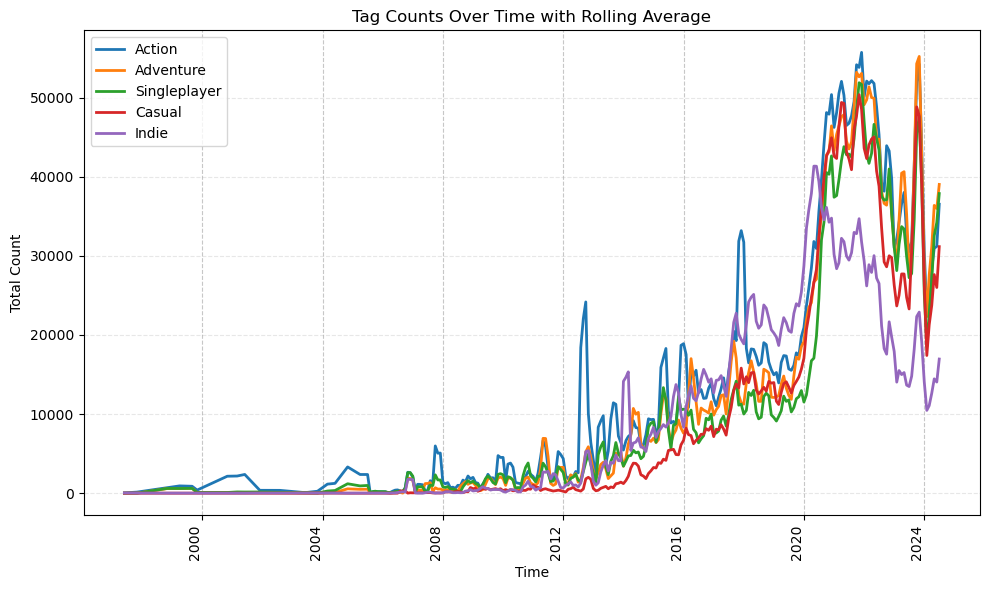

In [19]:
# Merge the 'month_year' column with the selected tags from pivot_cats_df
selected_tags = pivot_tags_df.sum().sort_values(ascending=False).head(5).index.to_list()

# Create a DataFrame with the month_year column and the selected tags
merged_df = pd.merge(clean_df[['month_year']], pivot_tags_df[selected_tags], how='inner', left_index=True, right_index=True)

# Group by 'month_year' and sum the values
grouped_df = merged_df.groupby('month_year').sum()

# Add a rolling average (window size can be adjusted for smoothing)
rolling_window_size = 3  # Example window size for smoothing (3 months, adjust as needed)
grouped_df_rolling = grouped_df.rolling(window=rolling_window_size, min_periods=1).mean()

# Plot both the rolling averages
plt.figure(figsize=(10, 6))


# Plot the rolling averages
grouped_df_rolling.plot(ax=plt.gca(), linewidth=2, label=f'{rolling_window_size}-month Rolling Average')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Total Count')
plt.title('Tag Counts Over Time with Rolling Average')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
# Split the 'estimated_owners' column into two new columns
est_owners = clean_df["estimated_owners"].str.split('-', expand=True)

# Rename the columns properly
est_owners.rename(columns={0: "Min", 1: "Max"}, inplace=True)

est_owners = est_owners.applymap(lambda x:int(x))

# Display the resulting DataFrame
est_owners.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96102 entries, 0 to 97399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Min     96102 non-null  int64
 1   Max     96102 non-null  int64
dtypes: int64(2)
memory usage: 2.2 MB


In [21]:
est_owners["Avg_own"] = (est_owners["Max"]-est_owners["Min"])/2
est_owners.head()

,Min,Max,Avg_own
0,0,20000,10000.0
1,0,20000,10000.0
2,0,20000,10000.0
3,0,20000,10000.0
4,0,20000,10000.0


In [22]:
clean_df["Sale"] = clean_df["price"]*est_owners["Avg_own"]
clean_df.head()

,name,release_date,price,short_description,windows,mac,linux,categories,positive,negative,estimated_owners,average_playtime_forever,peak_ccu,tags,tag_frequencies,app_id,Month,Year,month_year,Sale
0,Galactic Bowling,"Oct 21, 2008",19.99,Galactic Bowling is an exaggerated and stylize...,True,False,False,"[Single-player, Multi-player, Steam Achievemen...",6,11,0 - 20000,0,0,"[Indie, Casual, Sports, Bowling]","[22, 21, 21, 6]",20200,Oct,2008,2008-10-01,199900.0
1,Train Bandit,"Oct 12, 2017",0.99,THE LAW!! Looks to be a showdown atop a train....,True,True,False,"[Single-player, Steam Achievements, Full contr...",53,5,0 - 20000,0,0,"[Indie, Action, Pixel Graphics, 2D, Retro, Arc...","[109, 103, 100, 97, 93, 86, 84, 82, 76, 69, 65...",655370,Oct,2017,2017-10-01,9900.0
2,Jolt Project,"Nov 17, 2021",4.99,"Shoot vehicles, blow enemies with a special at...",True,False,False,[Single-player],0,0,0 - 20000,0,0,[],[],1732930,Nov,2021,2021-11-01,49900.0
3,Henosis™,"Jul 23, 2020",5.99,HENOSIS™ is a mysterious 2D Platform Puzzler w...,True,True,True,"[Single-player, Full controller support]",3,0,0 - 20000,0,0,"[2D Platformer, Atmospheric, Surreal, Mystery,...","[161, 154, 151, 145, 139, 128, 126, 122, 115, ...",1355720,Jul,2020,2020-07-01,59900.0
4,Two Weeks in Painland,"Feb 3, 2020",0.00,Two Weeks in Painland is a story-driven game a...,True,True,False,"[Single-player, Steam Achievements]",50,8,0 - 20000,0,0,"[Indie, Adventure, Nudity, Violent, Sexual Con...","[42, 41, 22, 21, 21, 11]",1139950,Feb,2020,2020-02-01,0.0


<Axes: xlabel='month_year'>

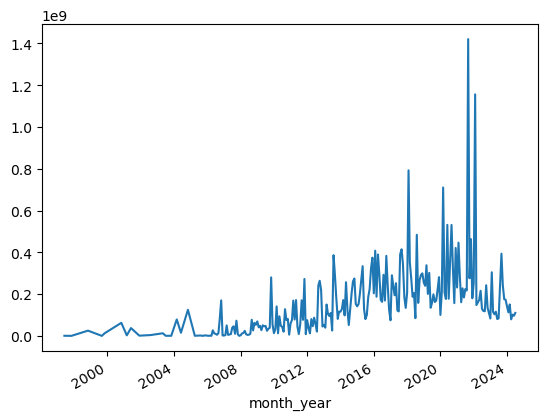

In [23]:
games = clean_df.groupby('month_year').sum()["Sale"]
games.plot()